In [1]:
# Data management
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd

# Graphics
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt

# Preprocessing and modelling
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns #para importar el dataset 
from dmba import plotDecisionTree, classificationSummary, regressionSummary


# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
#warnings.filterwarnings('once')
warnings.filterwarnings('ignore')

In [2]:
pip install dmba

In [2]:
# Data Loading
# The Titanic dataset is available in Seaborn as the ‘titanic’ dataset. It consists of the following columns:

# Survived: Survival status (0 = No, 1 = Yes)
# Pclass: Passenger class (1 = 1st class, 2 = 2nd class, 3 = 3rd class)
# Sex: Passenger’s gender
# Age: Passenger’s age
# SibSp: Number of siblings/spouses aboard
# Parch: Number of parents/children aboard
# Fare: Fare paid for the ticket
# Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
# Class: Equivalent to Pclass (1 = 1st class, 2 = 2nd class, 3 = 3rd class)
# Who: Passenger’s category (man, woman, child)
# Adult_male: Whether the passenger is an adult male or not (True or False)
# Deck: Cabin deck
# Embark_town: Port of embarkation (Cherbourg, Queenstown, Southampton)
# Alive: Survival status (yes or no)
# Alone: Whether the passenger is alone or not (True or False)
# Adult_male: Whether the passenger is an adult male or not (True or False)
# Alone: Whether the passenger is alone or not (True or False)
# Alive: Survival status (yes or no)
# Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
# Class: Equivalent to Pclass (1 = 1st class, 2 = 2nd class, 3 = 3rd class)

#Nuestro objetivo  es ver el perfil de la gente que sobrevivió. 
#Usamos un paquete de datos que viene en la libreria, listado de pasajeros de titanic y memás cosas
#El profe ha quitado los nombre 
    
data_train = sns.load_dataset('titanic')
data_train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
data_train.columns.values

array(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'], dtype=object)

In [4]:
data_train= data_train.drop(columns = ["survived", "pclass", "embarked", "who", "adult_male", "deck"]) #quito las redundantes o las que quiera quitar

In [5]:
data_train.columns.values

array(['sex', 'age', 'sibsp', 'parch', 'fare', 'class', 'embark_town',
       'alive', 'alone'], dtype=object)

In [6]:
data_train.info() 
#saber la info, tipos, tamaños... vemos que edades solo tengo 714 mientras que lo demas 891 
#para los datos que faltan puedo inventarme los que faltan o tirar a la basura unos cuantos datos. 
#en este caso lo mejor es eliminar las filas que tienen algo vacío. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   sex          891 non-null    object  
 1   age          714 non-null    float64 
 2   sibsp        891 non-null    int64   
 3   parch        891 non-null    int64   
 4   fare         891 non-null    float64 
 5   class        891 non-null    category
 6   embark_town  889 non-null    object  
 7   alive        891 non-null    object  
 8   alone        891 non-null    bool    
dtypes: bool(1), category(1), float64(2), int64(2), object(3)
memory usage: 50.7+ KB


In [7]:
data_train=data_train.dropna() #quitar los n/a y al final se me quedan 712 

In [8]:
data_train.info() #vemos que ahora todo coincide 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   sex          712 non-null    object  
 1   age          712 non-null    float64 
 2   sibsp        712 non-null    int64   
 3   parch        712 non-null    int64   
 4   fare         712 non-null    float64 
 5   class        712 non-null    category
 6   embark_town  712 non-null    object  
 7   alive        712 non-null    object  
 8   alone        712 non-null    bool    
dtypes: bool(1), category(1), float64(2), int64(2), object(3)
memory usage: 46.0+ KB


In [9]:
# Configuring train and test datasets
# ------------------------------------------------------------------------------
# Reparto conjunto de train y test --> Una para aprender y otra para checkear lo que he aprendido
# Nos interesa la aleatoriedad de la muestra, por lo que elegimos como se distribuyen estos datos de manera aleatoria. 

#Aquí utiliza la función de train_test_split para generar estos conjuntos
# La funcion nos devuelve xtrain (conjunto de entrenamiento menos la variable que clasifico que usare ocmo target)
# en xtest el resto de elementos que no estan en xtrain
#ytrain e y test corresponden a las decisiones es decir quien vivió y quien no vivió de los conjuntos xtest y xtrain
#Aqui lo que hace es que para entrenar me quita el alive= la columna alive la quita
#El segundo dataframe va a ser el target

X_train, X_test, y_train, y_test = train_test_split(
                                        data_train.drop(columns = "alive"), 
                                        data_train['alive'], #esta es la averiguación
                                        train_size= 0.7, # by default 0.75 is the amunt of data for training
                                        random_state = 123
                                                            )      

In [10]:
X_train.info() #Aqui mas casos que en test

<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 605 to 646
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   sex          498 non-null    object  
 1   age          498 non-null    float64 
 2   sibsp        498 non-null    int64   
 3   parch        498 non-null    int64   
 4   fare         498 non-null    float64 
 5   class        498 non-null    category
 6   embark_town  498 non-null    object  
 7   alone        498 non-null    bool    
dtypes: bool(1), category(1), float64(2), int64(2), object(2)
memory usage: 28.3+ KB


In [11]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 509 to 376
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   sex          214 non-null    object  
 1   age          214 non-null    float64 
 2   sibsp        214 non-null    int64   
 3   parch        214 non-null    int64   
 4   fare         214 non-null    float64 
 5   class        214 non-null    category
 6   embark_town  214 non-null    object  
 7   alone        214 non-null    bool    
dtypes: bool(1), category(1), float64(2), int64(2), object(2)
memory usage: 12.2+ KB


In [12]:
# count of each category value and checking categories in training and in test
#cuantos ejemplos de cada clase en el conjunto de entrenamiento y cuantos en el conjunto de test 
# lo vemos en numero y luego en porcentaje. Como son practicamente iguales los porcentajes, seguimos adelante. Es muy similar !!
# si me sale desequilibrado, lo vuelvo a hacer, o quizás tenga una clase que me esta fastidiando...

train_count= y_train.value_counts()
print("Training :\n", train_count)

test_count=y_test.value_counts()
print("\n Test :\n", test_count)


rows_train = len(X_train.axes[0]) 

rows_test = len(X_test.axes[0])

print("\n Porcentaje de casos de cada clase en training", 
      round(train_count[0]/rows_train,2), round(train_count[1]/rows_train,2))
print("\n Porcentaje de casos de cada clase en test  ", round(test_count[0]/rows_test,2), round(test_count[1]/rows_test,2))

Training :
 no     299
yes    199
Name: alive, dtype: int64

 Test :
 no     125
yes     89
Name: alive, dtype: int64

 Porcentaje de casos de cada clase en training 0.6 0.4

 Porcentaje de casos de cada clase en test   0.58 0.42


In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# One-hot-encoding of the categoric variables
# ------------------------------------------------------------------------------
# Identification of categoric and numerical variables/column
# cambiar numeros por texto, o al reves 
cat_cols = X_train.select_dtypes(include=['object', 'category', 'bool']).columns.to_list()
numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns.to_list()


In [14]:
cat_cols #las columnas que debe cambiar por numeros 

['sex', 'class', 'embark_town', 'alone']

In [15]:
np.unique(X_train["class"])

array(['First', 'Second', 'Third'], dtype=object)

In [16]:
X_train["class"].value_counts()

Third     245
First     134
Second    119
Name: class, dtype: int64

In [17]:
X_train["embark_town"].value_counts()

Southampton    382
Cherbourg       93
Queenstown      23
Name: embark_town, dtype: int64

In [18]:
numeric_cols

['age', 'sibsp', 'parch', 'fare']

In [19]:
# One-hot-encoding of the categoric variables
# ------------------------------------------------------------------------------
# Application of one-hot-encoding only to the categorical variables
preprocessor = ColumnTransformer(
                    [('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols)],
                    remainder='passthrough'
               )

# Once the object ColumnTransformer was created, using the method fit()
# the transforms are applied to the training and test datasets
# using transform(). Both operations at the same time using fit_transform().
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.fit_transform(X_test)

In [20]:
# Cheking NaN /null values
X_train.isnull().sum()*100/X_train.shape[0]


sex            0.0
age            0.0
sibsp          0.0
parch          0.0
fare           0.0
class          0.0
embark_town    0.0
alone          0.0
dtype: float64

In [21]:
# Obtaining names of columns for creation of a dataframe
encoded_cat = preprocessor.named_transformers_['onehot'].get_feature_names_out(cat_cols) #añadir out
labels = np.concatenate([ encoded_cat, numeric_cols])

In [22]:
labels

array(['sex_female', 'sex_male', 'class_First', 'class_Second',
       'class_Third', 'embark_town_Cherbourg', 'embark_town_Queenstown',
       'embark_town_Southampton', 'alone_False', 'alone_True', 'age',
       'sibsp', 'parch', 'fare'], dtype=object)

In [23]:
encoded_cat

array(['sex_female', 'sex_male', 'class_First', 'class_Second',
       'class_Third', 'embark_town_Cherbourg', 'embark_town_Queenstown',
       'embark_town_Southampton', 'alone_False', 'alone_True'],
      dtype=object)

In [24]:
# Conversion to dataframe
X_train_prep = pd.DataFrame(X_train_prep, columns=labels)
X_test_prep  = pd.DataFrame(X_test_prep, columns=labels)
X_train_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sex_female               498 non-null    float64
 1   sex_male                 498 non-null    float64
 2   class_First              498 non-null    float64
 3   class_Second             498 non-null    float64
 4   class_Third              498 non-null    float64
 5   embark_town_Cherbourg    498 non-null    float64
 6   embark_town_Queenstown   498 non-null    float64
 7   embark_town_Southampton  498 non-null    float64
 8   alone_False              498 non-null    float64
 9   alone_True               498 non-null    float64
 10  age                      498 non-null    float64
 11  sibsp                    498 non-null    float64
 12  parch                    498 non-null    float64
 13  fare                     498 non-null    float64
dtypes: float64(14)
memory usag

In [25]:
X_train_prep

,sex_female,sex_male,class_First,class_Second,class_Third,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton,alone_False,alone_True,age,sibsp,parch,fare
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,36.0,1.0,0.0,15.5500
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,42.0,0.0,1.0,8.4042
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,21.0,0.0,0.0,10.5000
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,48.0,1.0,0.0,76.7292
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,22.0,0.0,1.0,55.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,12.0,1.0,0.0,11.2417
494,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,8.0500
495,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,9.0,5.0,2.0,46.9000
496,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,65.0,0.0,0.0,26.5500


In [26]:
# Removing repeated column
X_train_prep= X_train_prep.drop(columns = ["sex_male"])
X_test_prep= X_test_prep.drop(columns = ["sex_male"])

# updatig coulmns names
labels= X_train_prep.columns.values

In [27]:
# Creating the model with decision tree
# ------------------------------------------------------------------------------
model = DecisionTreeClassifier(
            max_depth         = 5,
            criterion         = 'gini', #se pueden usar otros pero yo uso el de clase
            random_state      = 123
          )

# Entrenamiento del modelo
# ------------------------------------------------------------------------------
model.fit(X_train_prep, y_train) # para ajustarlo 

DecisionTreeClassifier(max_depth=5, random_state=123)

Tree Depth: 5
Number of leaves or terminal nodes: 25


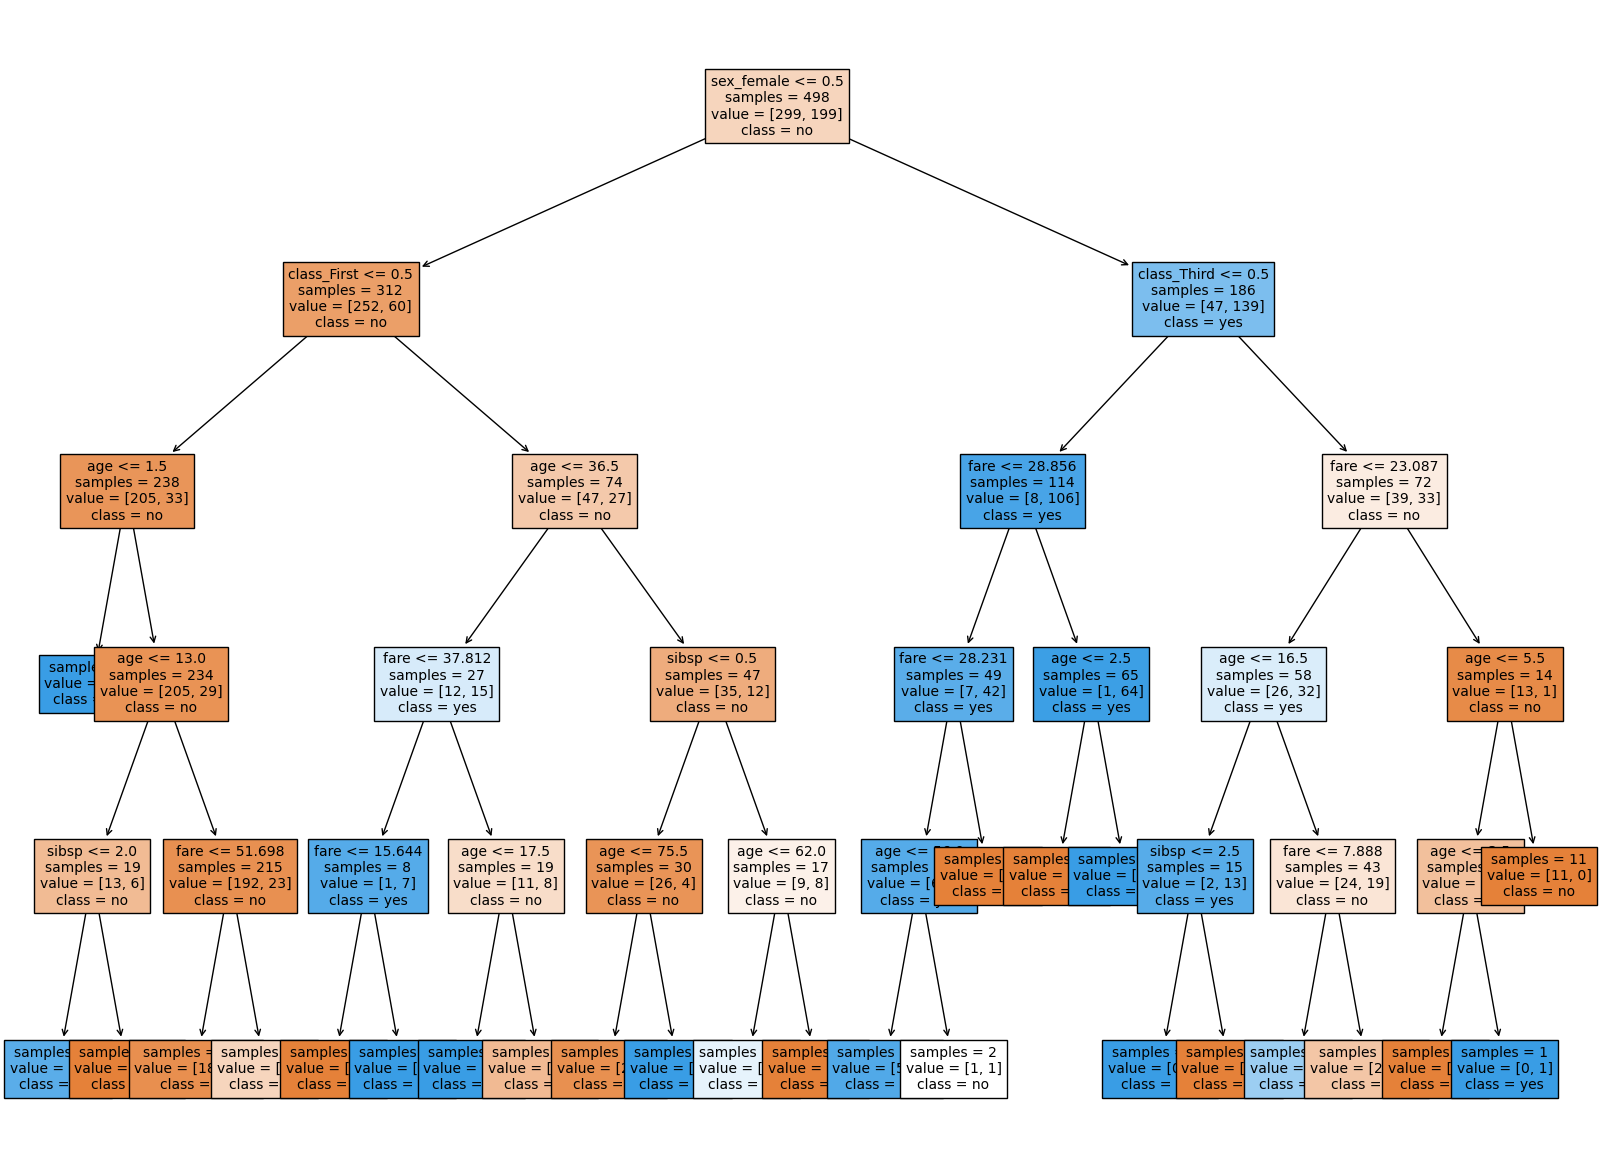

In [28]:
# Estructura del árbol creado
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(20, 15))

print(f"Tree Depth: {model.get_depth()}")
print(f"Number of leaves or terminal nodes: {model.get_n_leaves()}")

#hay que decir cual es cual en las clases
#pasar el modelo, las etiquetas
plot = plot_tree(
            decision_tree = model,
            feature_names = labels.tolist(),
            class_names   = ['no', 'yes'],
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            ax            = ax
       )

#los colores nos indican que clases mayoritarias van dentro 
#partirmos de entrenamento, class = no --> pone que la gente no vivio en ese punto del arbol. El serparador de sex_female = 0.5 y compara con ello. --> esto separa entre hombres y mujeres
#el azul va llevando la class = si osea los q sobreviven

#abajo del todo vemos las caracteristicas  de la geente q se salvó en azul muy oscuro

# hemos reducido todo a 25 perfiles, y vemos qué perfiles se salvan y cuales no 

In [29]:
# get the text representation
from sklearn import tree
#text_representation = tree.export_text(model)  # generic features

text_representation = tree.export_text(model, feature_names= list(X_train_prep.columns.values) )



print(text_representation)

|--- sex_female <= 0.50
|   |--- class_First <= 0.50
|   |   |--- age <= 1.50
|   |   |   |--- class: yes
|   |   |--- age >  1.50
|   |   |   |--- age <= 13.00
|   |   |   |   |--- sibsp <= 2.00
|   |   |   |   |   |--- class: yes
|   |   |   |   |--- sibsp >  2.00
|   |   |   |   |   |--- class: no
|   |   |   |--- age >  13.00
|   |   |   |   |--- fare <= 51.70
|   |   |   |   |   |--- class: no
|   |   |   |   |--- fare >  51.70
|   |   |   |   |   |--- class: no
|   |--- class_First >  0.50
|   |   |--- age <= 36.50
|   |   |   |--- fare <= 37.81
|   |   |   |   |--- fare <= 15.64
|   |   |   |   |   |--- class: no
|   |   |   |   |--- fare >  15.64
|   |   |   |   |   |--- class: yes
|   |   |   |--- fare >  37.81
|   |   |   |   |--- age <= 17.50
|   |   |   |   |   |--- class: yes
|   |   |   |   |--- age >  17.50
|   |   |   |   |   |--- class: no
|   |   |--- age >  36.50
|   |   |   |--- sibsp <= 0.50
|   |   |   |   |--- age <= 75.50
|   |   |   |   |   |--- class: no
|   |

In [30]:
# Model training error
#-------------------------------------------------------------------------------

#como se comporta en train, con los datos que ha entrenado

predictions_train = model.predict(X = X_train_prep,)

print("Confussion Matrix -- TRAIN")
print("-------------------")
confusion_matrix(
    y_true    = y_train,
    y_pred    = predictions_train
)

#de la matriz d confusión 

# aciertos fallos (1ºclase) 
# fallos aciertos (2º clase) 

Confussion Matrix -- TRAIN
-------------------


array([[282,  17],
       [ 43, 156]], dtype=int64)

In [31]:
accuracy_train = accuracy_score(
            y_true    = y_train,
            y_pred    = predictions_train,
            normalize = True
           )
#print(f"Accuracy in train : {100 * accuracy_train} %")
print("\n Accuracy in train 1s: {:.2f} %".format(100 * accuracy_train))

#fallos / nº casos 
# este valor esta bien porque tampcoo podemos esperar un arbol perfecto perfecto 


 Accuracy in train 1s: 87.95 %


In [32]:
# Model test error
#-------------------------------------------------------------------------------

# dandole un dato me va a decir si un pasajero sobrevive o no 

predictions_test = model.predict(X = X_test_prep,)

print("Confussion Matrix -- TEST")
print("-------------------")
confusion_matrix(
    y_true    = y_test,
    y_pred    = predictions_test
)

Confussion Matrix -- TEST
-------------------


array([[111,  14],
       [ 29,  60]], dtype=int64)

In [33]:
accuracy_test = accuracy_score(
            y_true    = y_test,
            y_pred    = predictions_test,
            normalize = True
           )
#print(f"Accuracy in test 1s: {100 * accuracy_test} %")

print("\n Accuracy in test 1s: {:.2f} %".format(100 * accuracy_test))

# porcentaje d acierto algo menor pero esta bien, porque en test es mas complicado acertar
# podemos decir que con este arbol podemos acertar 8 casos de cada 10, ver si nos interesa para nuestro negocio 

# hasta aqui sin podar nada



 Accuracy in test 1s: 79.91 %


In [35]:
# Analyzing Pruning
#-------------------------


#SEVERAL METHODS ARE PROPOSED BELOW



In [34]:
# Common-sense selection of alpha based on cost-complexity values

#Obtaining diferent options of alpha values

# posibles valores del alpha, coste de complejidad

path = model.cost_complexity_pruning_path(X_train_prep, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

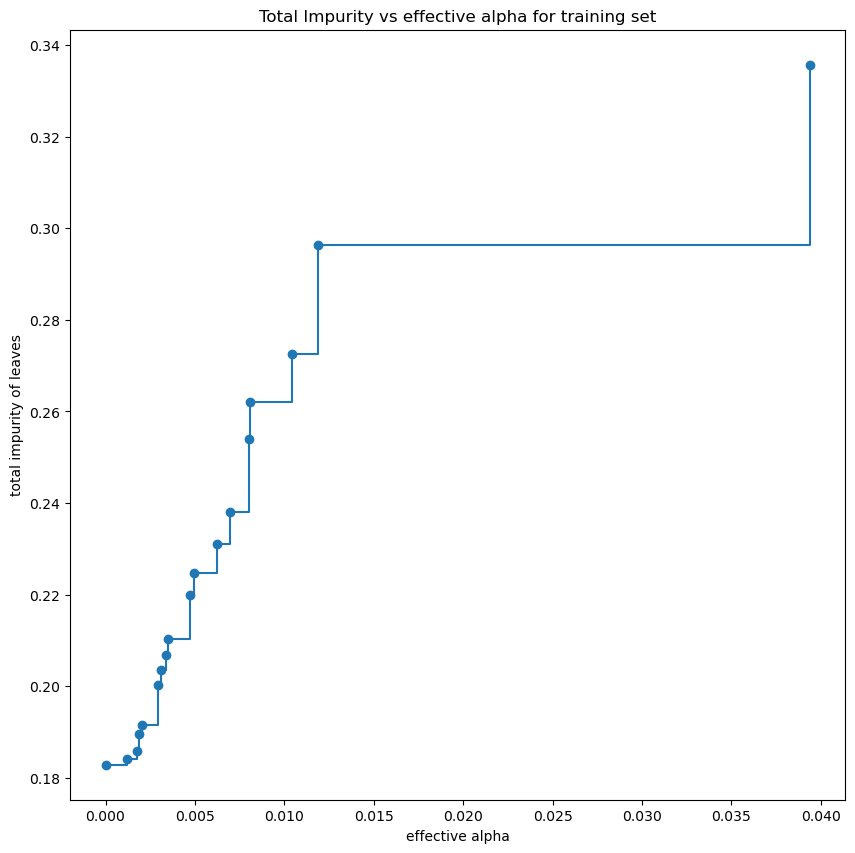

In [35]:
# Representation Impurity vs effective alpha for training set

fig, ax = plt.subplots(figsize=(10,10))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

# me voy pintando el resultado obtenido con los diferentes valores de alpha 
# a medida que avanza alpha, la impureza va aumentando 
# la impureza es menor cuando el alpha es 0 , cuando no esta podado el arbol 

# de 0.18 a 0.2 tampoco es muy grande lo que quitas

In [36]:
# Different alpha options are tried
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train_prep, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.14415552330601566


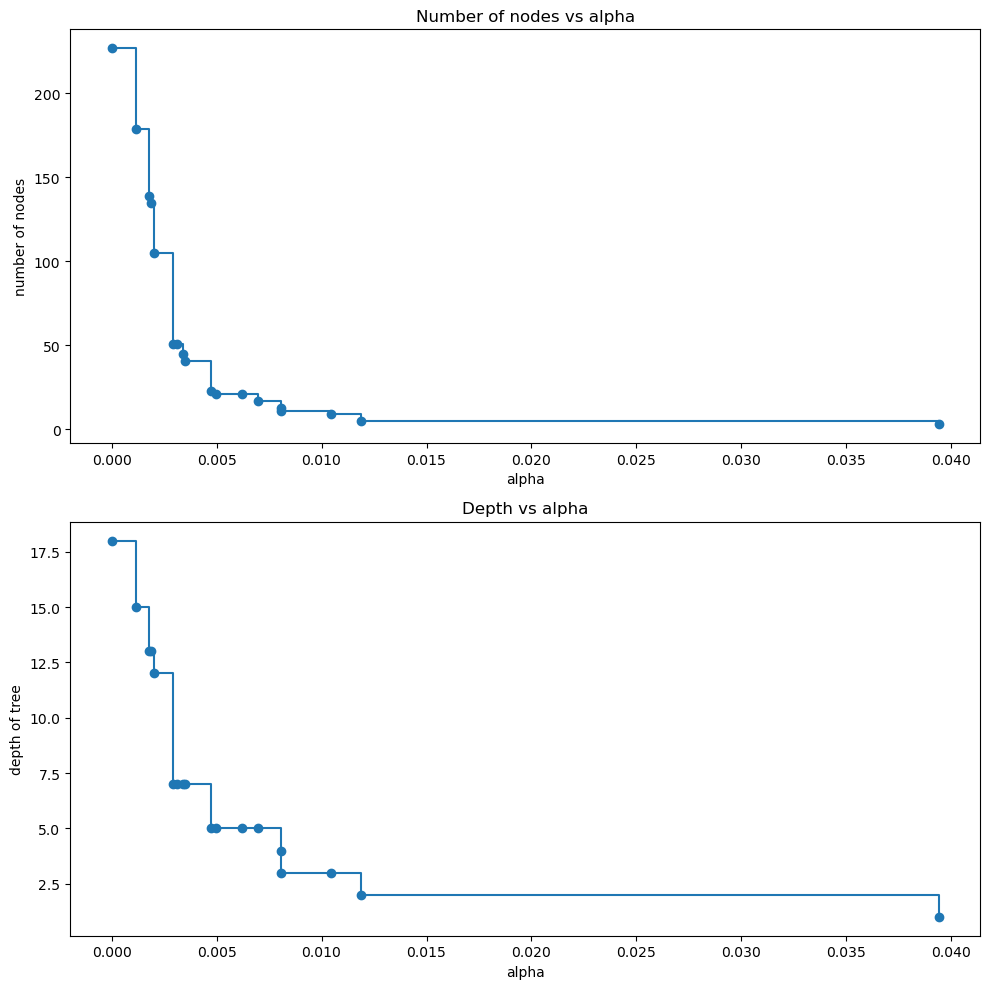

In [37]:
# we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node
# This is not classification

clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots( 2, 1, figsize=(10,10))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

#cuando podo poco, tengo muchos nodos 
#a medida que el alpha es mas peque, te vas quedando con menos hojas

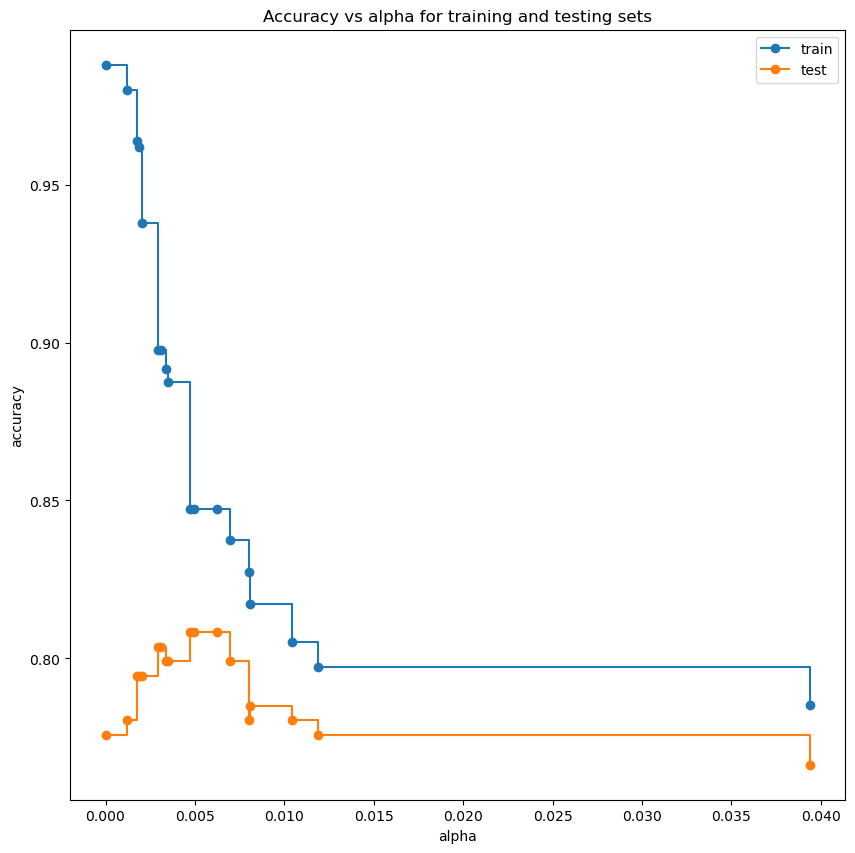

In [38]:
# Cheking scores in training and test datasets for different alphas

train_scores = [clf.score(X_train_prep, y_train) for clf in clfs]
test_scores = [clf.score(X_test_prep, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

# vemos que pasa con los alphas en train y test. 
# a menor alpha, más precisión en train, pero no en test, entonces tendría q encontrar algun punto de equilibrio. Seriía entre 0.005 y 0.010. 

In [39]:
# the scores obtained are now printed and ordered by the best test score

eva_df = pd.DataFrame({'ccp_alphas': ccp_alphas, 'train_scores': train_scores, 'test_scores': test_scores})
eva_df = eva_df.sort_values(['test_scores'], ascending = False)
eva_df.head(10)

# vemos los porcentajes obtenidos en train y test. Decido por donde podo

,ccp_alphas,train_scores,test_scores
9,0.004727,0.847390,0.808411
10,0.004957,0.847390,0.808411
11,0.006208,0.847390,0.808411
5,0.002930,0.897590,0.803738
6,0.003121,0.897590,0.803738
7,0.003378,0.891566,0.799065
8,0.003514,0.887550,0.799065
12,0.006961,0.837349,0.799065
2,0.001765,0.963855,0.794393
3,0.001865,0.961847,0.794393


In [40]:
# Obtaining the best alpha from the previous list
best_alpha= eva_df.iloc[0][0]

best_alpha


0.004727242302543505

In [ ]:
pip install pydotplus

In [44]:
# fit the pruned tree with best alpha
import pydotplus
from dmba import plotDecisionTree, classificationSummary, regressionSummary

prunedtree_I = DecisionTreeClassifier(ccp_alpha=best_alpha, random_state=0)

prunedtree_I.fit(X_train_prep, y_train)


classificationSummary(y_train, prunedtree_I.predict(X_train_prep))
classificationSummary(y_test, prunedtree_I.predict(X_test_prep))

Confusion Matrix (Accuracy 0.8474)

       Prediction
Actual   0   1
     0 278  21
     1  55 144
Confusion Matrix (Accuracy 0.8084)

       Prediction
Actual   0   1
     0 112  13
     1  28  61


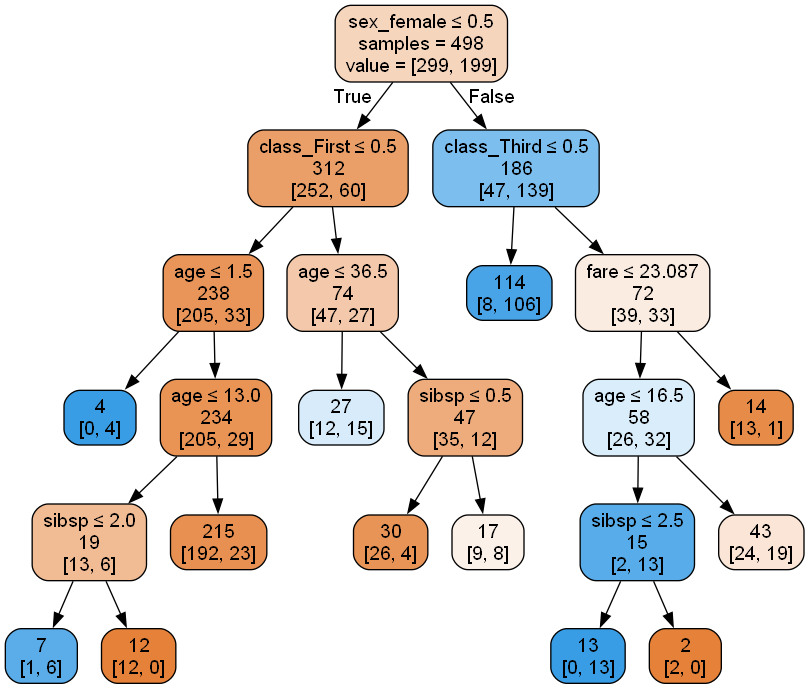

In [45]:


plotDecisionTree(prunedtree_I, feature_names=X_train_prep.columns)

Tree Depth: 5
Number of leaves or terminal nodes: 12


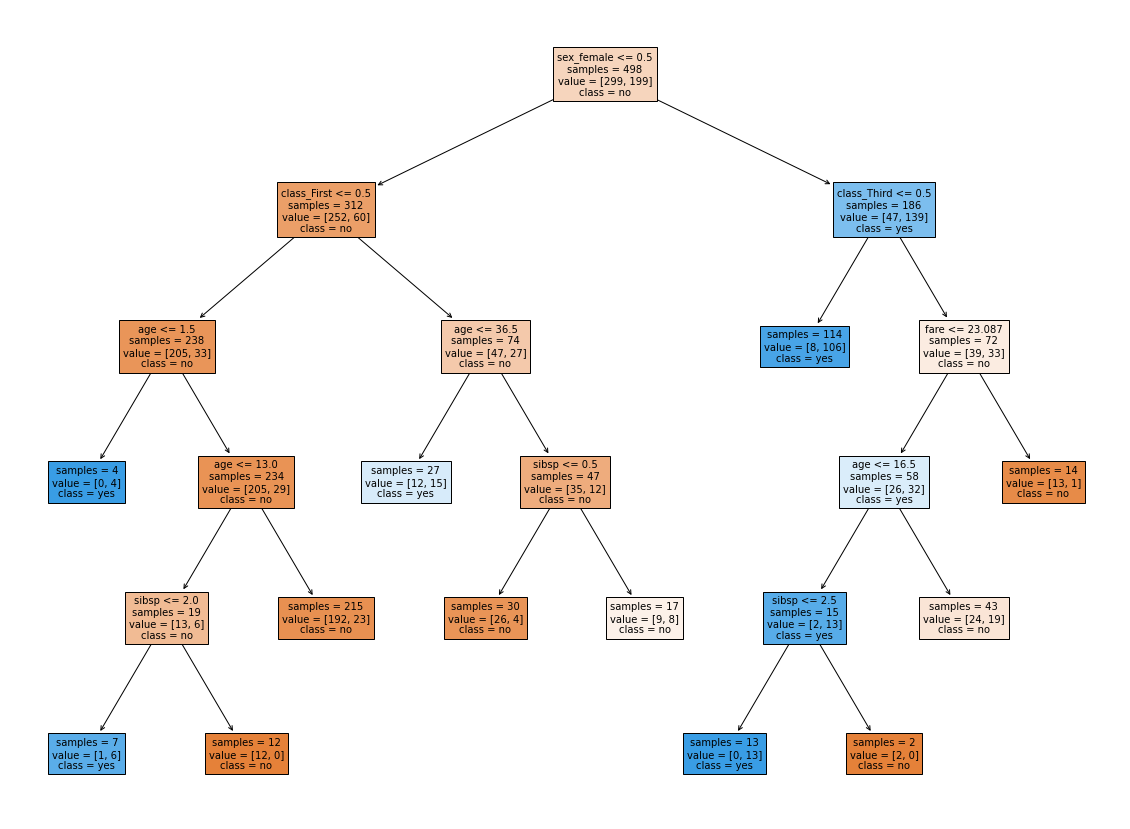

In [46]:
# Estructura del árbol creado
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(20, 15))

print(f"Tree Depth: {prunedtree_I.get_depth()}")
print(f"Number of leaves or terminal nodes: {prunedtree_I.get_n_leaves()}")

plot = plot_tree(
            decision_tree = prunedtree_I,
            feature_names = labels.tolist(),
            class_names   = ['no', 'yes'],
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            ax            = ax
       )

In [47]:
#  II.  Alternative method using GridSearchCV to fine tune method parameters
#----------------------------------------------------------------------

In [48]:
# Start with an initial guess for parameters
param_grid = {
    'max_depth':[5,8,12],
    'min_samples_split':[4,8, 16],
    'min_impurity_decrease': [0.0001, 0.0005, 0.001, 0.005, 0.01]
}

gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=10, n_jobs=1)
gridSearch.fit(X_train_prep, y_train)

print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

#busca como de estable es el modelo frente a diferentes entradas

#probar un modelo unico 10 veces con datos distintos

Initial score:  0.8194693877551019
Initial parameters:  {'max_depth': 8, 'min_impurity_decrease': 0.0005, 'min_samples_split': 8}


In [49]:
# Adapt grid based on result from initial grid search
param_grid = {
 'max_depth': list(range(7, 8,10)), 
 'min_samples_split': list(range(6, 8, 12)), 
 'min_impurity_decrease': [x/10000 for x in range(1, 900, 100)], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=10, n_jobs=-1)
gridSearch.fit(X_train_prep, y_train)

print('Improved score: ', gridSearch.best_score_)
print('Improved parameters: ', gridSearch.best_params_)
bestClassTree = gridSearch.best_estimator_

Improved score:  0.8074285714285713
Improved parameters:  {'max_depth': 7, 'min_impurity_decrease': 0.0001, 'min_samples_split': 6}


In [50]:
# fit the final model with best parameters: {'max_depth': 8, 'min_impurity_decrease': 0.0001, 'min_samples_split': 21}

# prunedtree = gridSearch.best_estimator_
# or:
prunedtree_II = DecisionTreeClassifier(random_state = 1, max_depth=7, min_impurity_decrease=0.0001, min_samples_split=6)
prunedtree_II.fit(X_train_prep, y_train)

classificationSummary(y_train, prunedtree_II.predict(X_train_prep))
classificationSummary(y_test, prunedtree_II.predict(X_test_prep))

Confusion Matrix (Accuracy 0.9116)

       Prediction
Actual   0   1
     0 286  13
     1  31 168
Confusion Matrix (Accuracy 0.7897)

       Prediction
Actual   0   1
     0 109  16
     1  29  60


In [51]:
# Final pruned tree
# ------------------------------------------------------------------------------
#model_final = grid.best_estimator_
print(f" Tree Depth: {prunedtree_II.get_depth()}")
print(f"Number of terminal nodes: {prunedtree_II.get_n_leaves()}")

 Tree Depth: 7
Number of terminal nodes: 41


In [52]:
# Error de test del modelo final
#-------------------------------------------------------------------------------
predictions = prunedtree_II.predict(X = X_test_prep)

accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predictions,
            normalize = True
           )
print(f" TEST accuracy: {100 * accuracy} %")

 TEST accuracy: 78.97196261682244 %


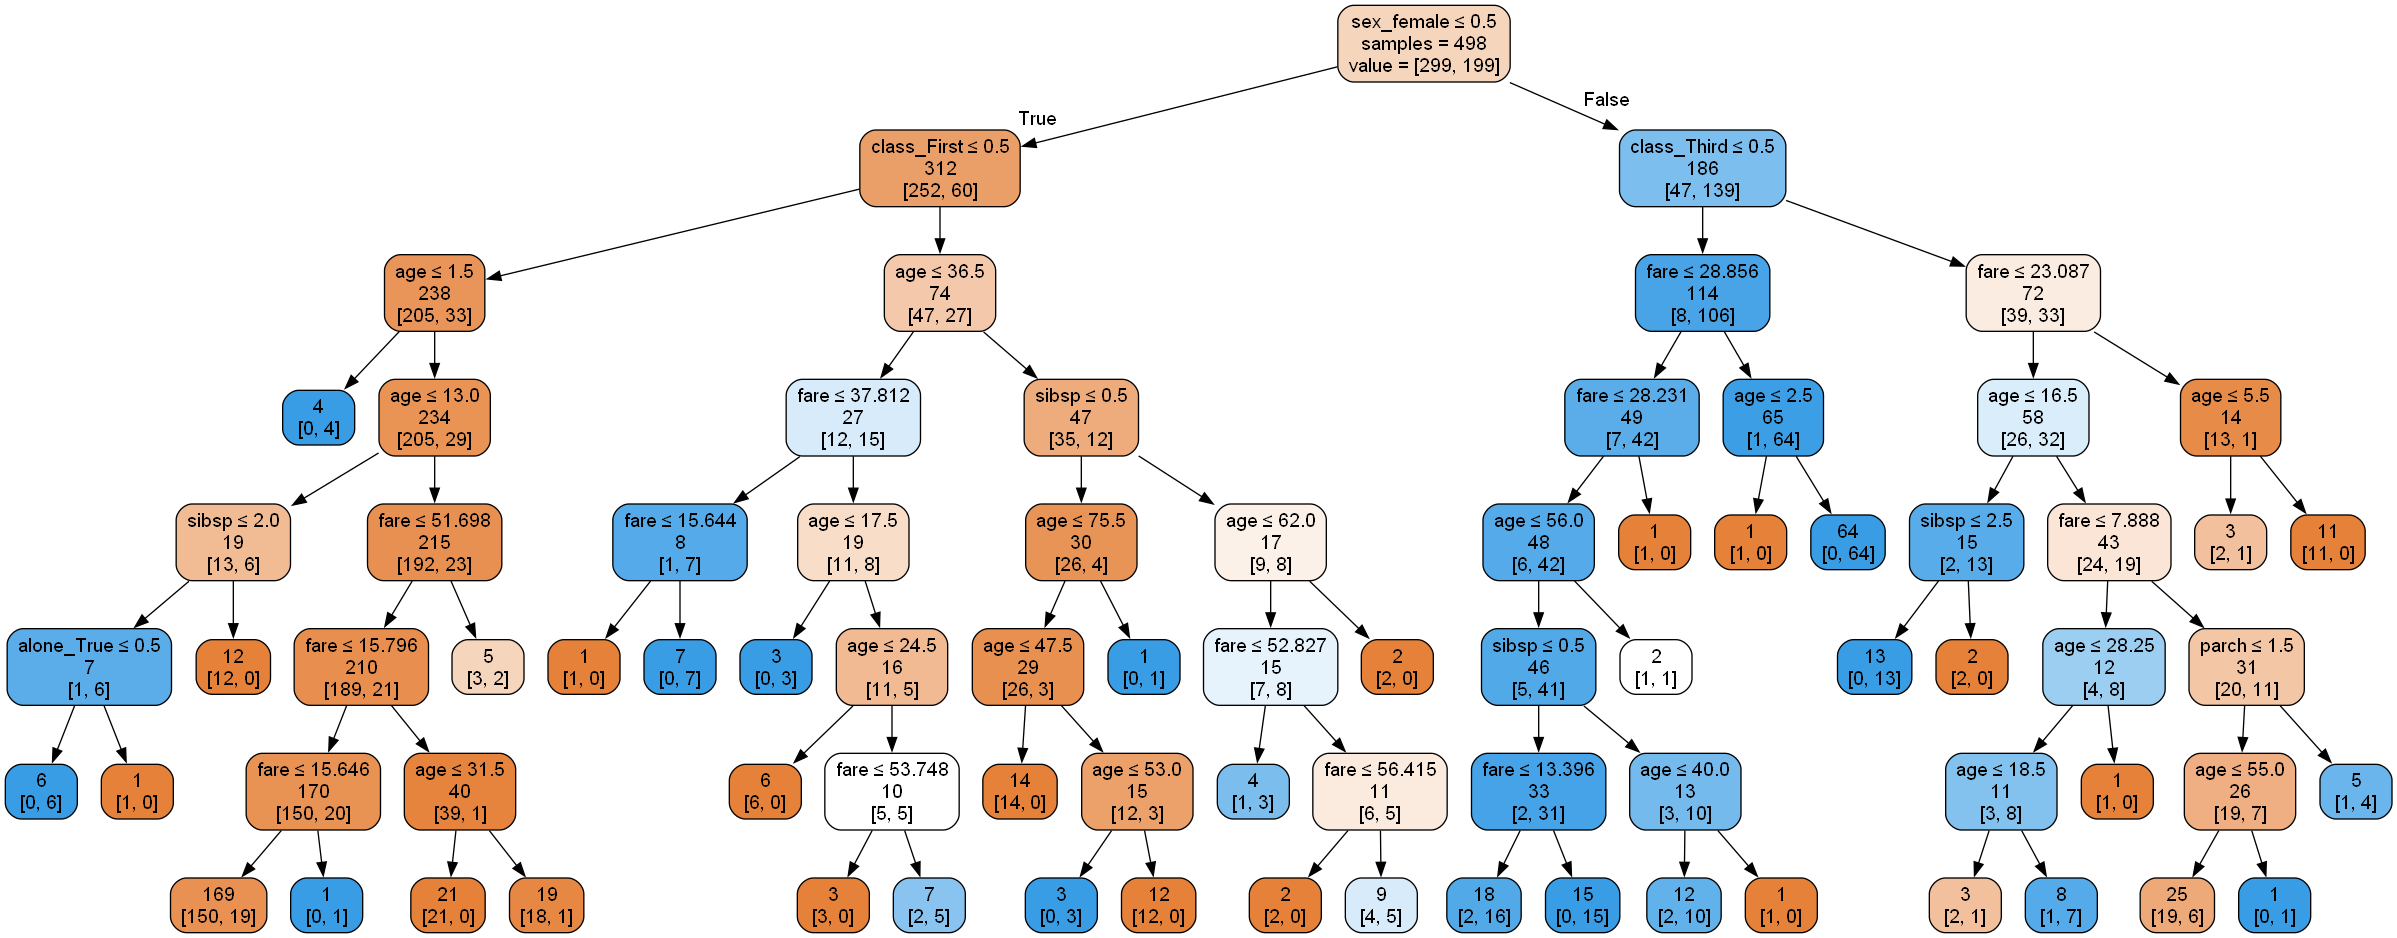

In [53]:
plotDecisionTree(prunedtree_II, feature_names=X_test_prep.columns)

Tree Depth: 7
Number of leaves or terminal nodes: 41


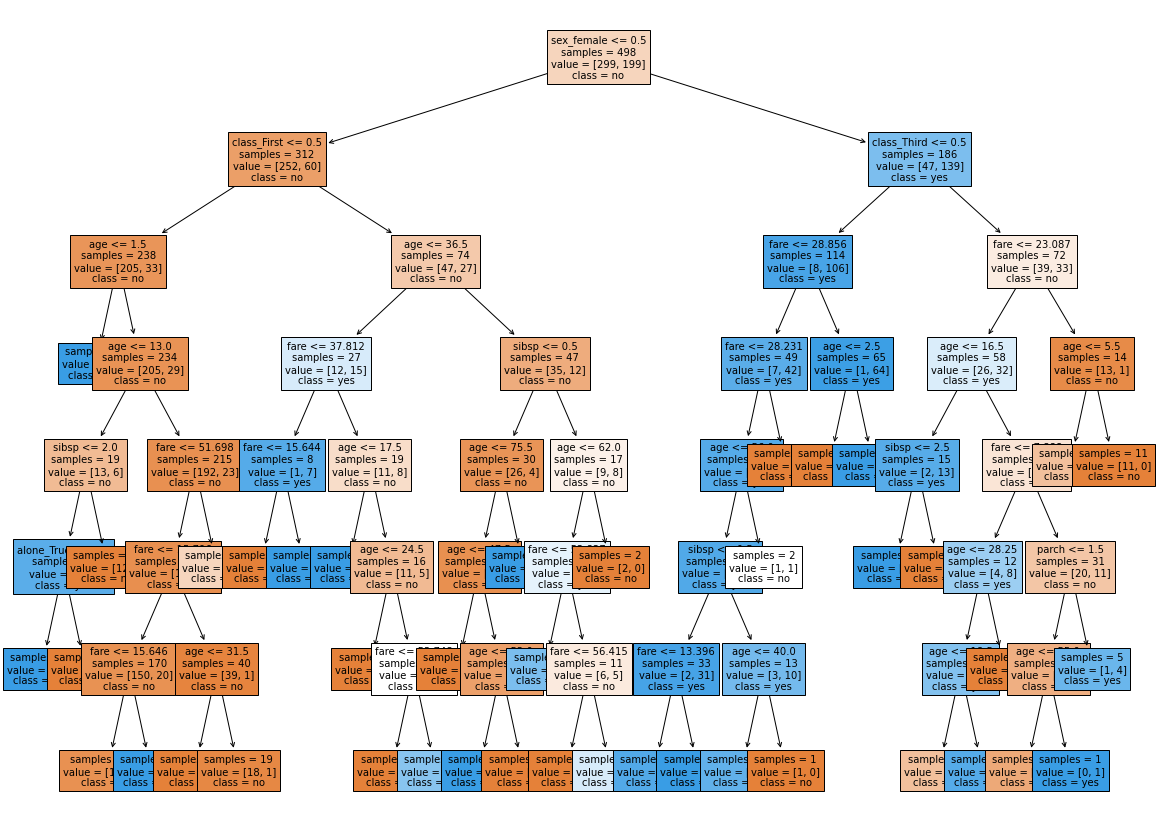

In [54]:
# Estructura del árbol creado
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(20, 15))

print(f"Tree Depth: {prunedtree_II.get_depth()}")
print(f"Number of leaves or terminal nodes: {prunedtree_II.get_n_leaves()}")

plot = plot_tree(
            decision_tree = prunedtree_II,
            feature_names = labels.tolist(),
            class_names   = ['no', 'yes'],
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            ax            = ax
       )

In [55]:
# METHOD:  prune the tree with cost complexity pruning - Cross Validation
# esto es otro metodo mas rapido y con resultados parecidos para hacer llo mismo, aunque el mejor metodo es el anterior 

In [56]:
from sklearn.model_selection import cross_val_score

# fit the tree
fulltree = DecisionTreeClassifier(random_state=2)
fulltree.fit(X_train_prep, y_train)


path = fulltree.cost_complexity_pruning_path(X_train_prep, y_train)
alphas, impurities = path.ccp_alphas, path.impurities

mean, std = [], []
for i in alphas:
    tree = DecisionTreeClassifier(ccp_alpha=i, random_state=0)
#     cross validation for each alpha value
    scores = cross_val_score(tree, X_train_prep, y_train, cv=5)
    mean.append(scores.mean())
    std.append(scores.std())
# keep a record of the values of alpha, mean, standard deviation
eva_df = pd.DataFrame({'alpha': alphas, 'mean': mean, 'std': std})
eva_df = eva_df.sort_values(['mean'], ascending = False)
eva_df.head(10)

,alpha,mean,std
29,0.003213,0.823293,0.027357
28,0.002930,0.823293,0.028782
32,0.003514,0.821293,0.027885
30,0.003292,0.821293,0.027885
39,0.006961,0.821273,0.027257
31,0.003442,0.819273,0.026154
33,0.004034,0.817293,0.030527
34,0.004061,0.817293,0.030527
38,0.006208,0.813273,0.026445
27,0.002621,0.811172,0.032408


In [57]:
# fit the pruned tree - cv
prunedtree_cv = DecisionTreeClassifier(ccp_alpha=eva_df.iloc[29, 0], random_state=0)
prunedtree_cv.fit(X_train_prep, y_train)

classificationSummary(y_train, prunedtree_cv.predict(X_train_prep))
classificationSummary(y_test, prunedtree_cv.predict(X_test_prep))

Confusion Matrix (Accuracy 0.7851)

       Prediction
Actual   0   1
     0 252  47
     1  60 139
Confusion Matrix (Accuracy 0.7664)

       Prediction
Actual   0   1
     0 108  17
     1  33  56


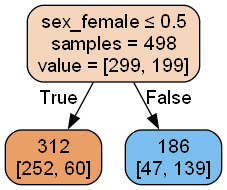

In [58]:
plotDecisionTree(prunedtree_cv, feature_names=X_train_prep.columns)

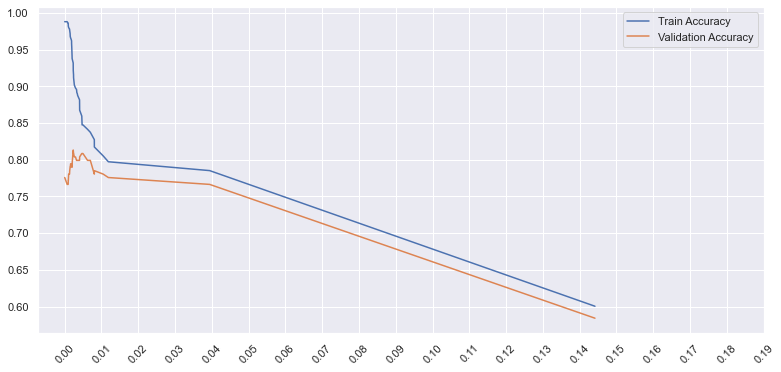

In [59]:
# Tree pruning without cross validation
accuracy_train, accuracy_val = [], []
clfs = []
    
for i in alphas:
    tree = DecisionTreeClassifier(ccp_alpha=i, random_state=0)
    tree.fit(X_train_prep, y_train)
    clfs.append(tree)
    
    train_y_pred = tree.predict(X_train_prep)
    val_y_pred = tree.predict(X_test_prep)
    accuracy_train.append(accuracy_score(y_train, train_y_pred))
    accuracy_val.append(accuracy_score(y_test, val_y_pred))

sns.set()
plt.figure(figsize=(13, 6))
sns.lineplot(y = accuracy_train, x = alphas, label = 'Train Accuracy')
sns.lineplot(y = accuracy_val, x = alphas, label = 'Validation Accuracy')
plt.xticks(ticks = np.arange(0, 0.2, 0.01), rotation = 45)
plt.show()

In [60]:
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

eva_df2 = pd.DataFrame({'alpha': alphas, 'node_counts':node_counts, 'depth': depth,
                       'acc_train':accuracy_train, 'acc_val':accuracy_val,
                      'acc_diff': np.array(accuracy_train) - np.array(accuracy_val)})
eva_df2.sort_values(by = ['acc_val', 'node_counts'], ascending = False).iloc[:10,:]

,alpha,node_counts,depth,acc_train,acc_val,acc_diff
23,0.002306,95,12,0.931727,0.813084,0.118643
24,0.002322,79,12,0.921687,0.813084,0.108603
25,0.002398,73,12,0.915663,0.808411,0.107251
26,0.002410,69,12,0.911647,0.808411,0.103235
35,0.004641,27,5,0.859438,0.808411,0.051027
36,0.004727,23,5,0.847390,0.808411,0.038978
37,0.004957,21,5,0.847390,0.808411,0.038978
27,0.002621,57,7,0.901606,0.803738,0.097868
28,0.002930,51,7,0.897590,0.803738,0.093852
34,0.004061,33,7,0.867470,0.803738,0.063732


In [61]:
# fit the pruned tree - non cv
# Selecting case with minimum difference value 

prunedtree_III = DecisionTreeClassifier(ccp_alpha=eva_df2.iloc[23, 0], random_state=0)
prunedtree_III.fit(X_train_prep, y_train)

classificationSummary(y_train, prunedtree_III.predict(X_train_prep))
classificationSummary(y_test, prunedtree_III.predict(X_test_prep))

Confusion Matrix (Accuracy 0.9317)

       Prediction
Actual   0   1
     0 290   9
     1  25 174
Confusion Matrix (Accuracy 0.8131)

       Prediction
Actual   0   1
     0 109  16
     1  24  65


In [62]:
# Final pruned tree
# ------------------------------------------------------------------------------
#model_final = grid.best_estimator_
print(f" Tree Depth: {prunedtree_III.get_depth()}")
print(f"Number of terminal nodes: {prunedtree_III.get_n_leaves()}")

 Tree Depth: 12
Number of terminal nodes: 48


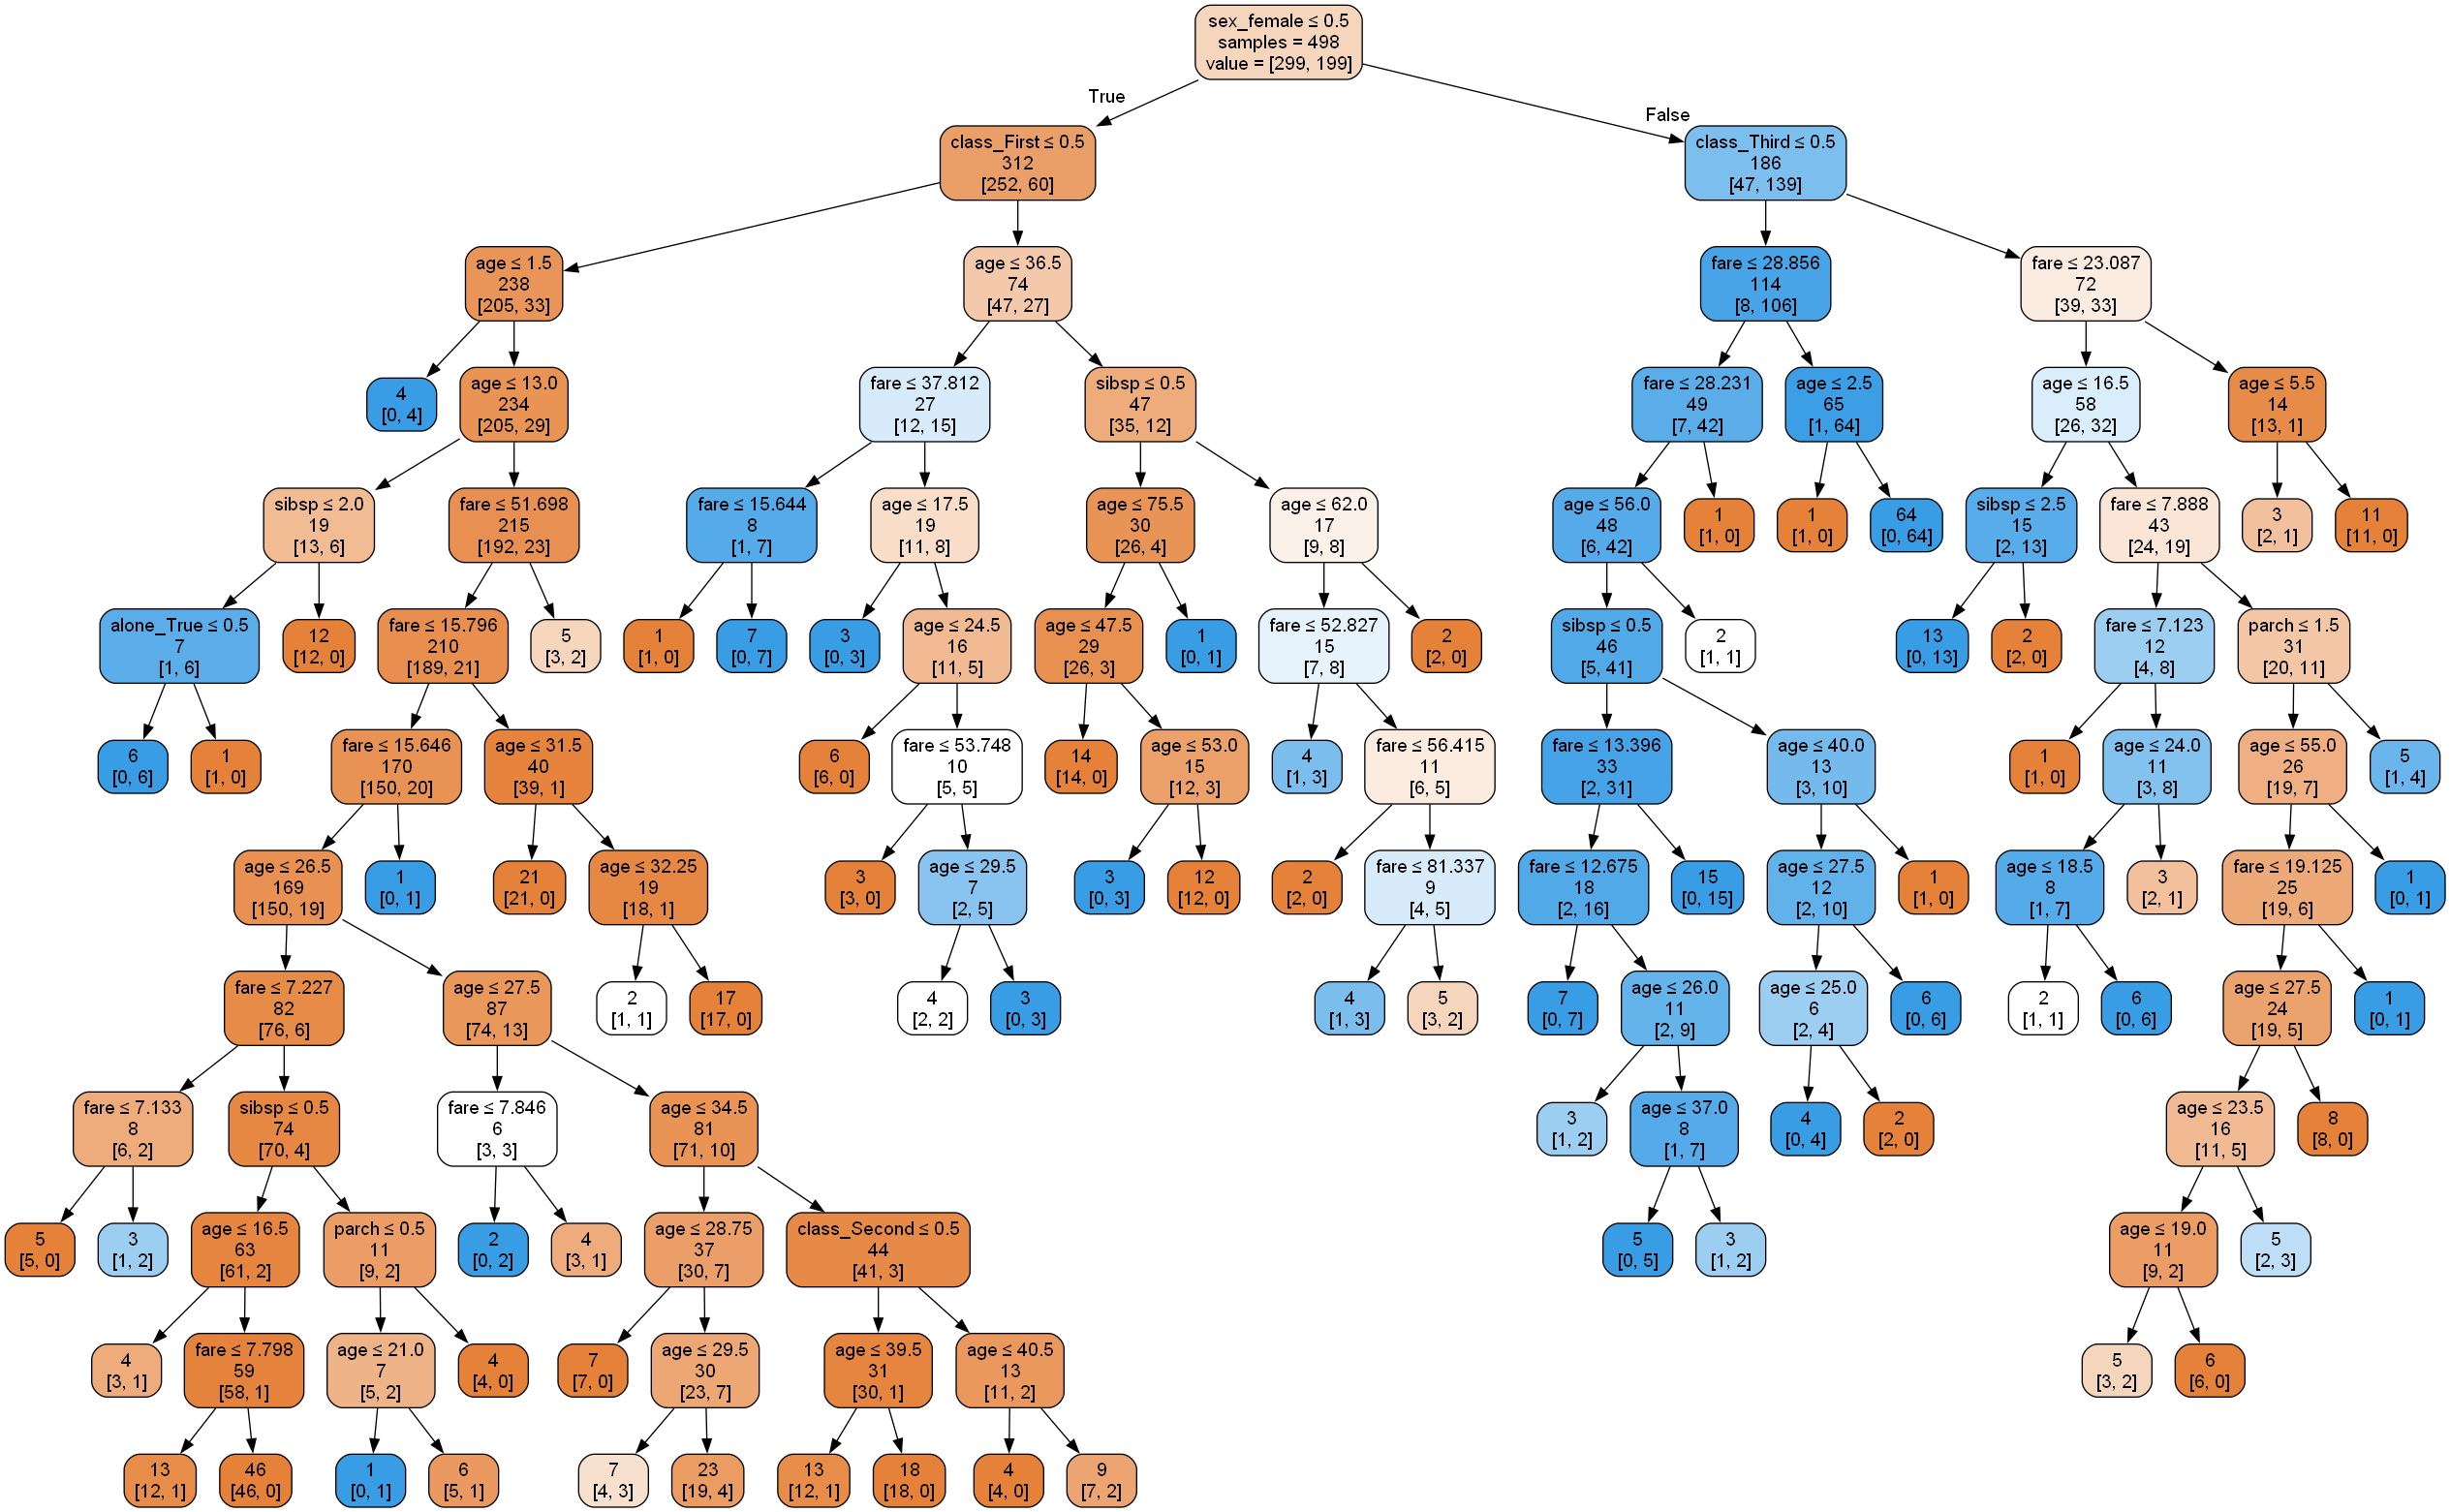

In [63]:
# Implementation
# By comparing the accuracy results from the  evaluations, the last one is selected
# Now fit a model with all the data we have so that it's more robust
tree_final = DecisionTreeClassifier(random_state = 1, max_depth=12, min_impurity_decrease=0.0001, min_samples_split=6)
tree_final.fit(X_train_prep, y_train)
plotDecisionTree(tree_final, feature_names = X_train_prep.columns)

In [64]:
print("Importance of predictors ")
print("-------------------------------------------")
importance_predictors = pd.DataFrame(
                            {'predictor': labels.tolist(),
                             'importance': tree_final.feature_importances_}
                            )
importance_predictors.sort_values('importance', ascending=False)

Importance of predictors 
-------------------------------------------


,predictor,importance
0,sex_female,0.374712
9,age,0.256643
12,fare,0.141312
3,class_Third,0.102409
10,sibsp,0.069907
1,class_First,0.030154
11,parch,0.014502
8,alone_True,0.008948
2,class_Second,0.001414
4,embark_town_Cherbourg,0.000000


In [65]:
# Prediction of probabilities
#-------------------------------------------------------------------------------
predictions = tree_final.predict_proba(X = X_test_prep)
predictions[:10, :]

array([[0.6       , 0.4       ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.25      , 0.75      ],
       [0.        , 1.        ],
       [0.57142857, 0.42857143],
       [0.        , 1.        ],
       [0.4       , 0.6       ],
       [0.        , 1.        ]])

In [66]:
# Classification using class of higher probability
# ------------------------------------------------------------------------------
df_predictions = pd.DataFrame(data=predictions, columns=['0', '1'])
df_predictions['classificacion_default_0.5'] = np.where(df_predictions['0'] > df_predictions['1'], 0, 1)
df_predictions.head(10)

,0,1,classificacion_default_0.5
0,0.600000,0.400000,0
1,1.000000,0.000000,0
2,0.000000,1.000000,1
3,0.000000,1.000000,1
4,0.250000,0.750000,1
5,0.000000,1.000000,1
6,0.571429,0.428571,0
7,0.000000,1.000000,1
8,0.400000,0.600000,1
9,0.000000,1.000000,1


In [67]:
# Final Classification using a threshold 0.8 for class = 1.
# ------------------------------------------------------------------------------
df_predictions['classificacion_custom_0.8'] = np.where(df_predictions['1'] > 0.8, 1, 0)
df_predictions.iloc[1:20, :]

,0,1,classificacion_default_0.5,classificacion_custom_0.8
1,1.000000,0.000000,0,0
2,0.000000,1.000000,1,1
3,0.000000,1.000000,1,1
4,0.250000,0.750000,1,0
5,0.000000,1.000000,1,1
6,0.571429,0.428571,0,0
7,0.000000,1.000000,1,1
8,0.400000,0.600000,1,0
9,0.000000,1.000000,1,1
10,1.000000,0.000000,0,0
